<a href="https://colab.research.google.com/github/clementinec/desn2003/blob/main/DataVisualization_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Optional) Only when interested in AutoML

In [1]:
#Install the library that you need.
!pip install pycaret

In [5]:
from pycaret.classification import *

In [3]:
import pandas as pd

In [15]:
df=pd.read_csv('example_data.csv')
df=df[::5]

In [18]:
s=setup(data=df,target='class',remove_multicollinearity=True,multicollinearity_threshold=0.3)

,Description,Value
0,Session id,2520
1,Target,class
2,Target type,Multiclass
3,Target mapping,"I: 0, II: 1, III: 2"
4,Original data shape,"(2963, 41)"
5,Transformed data shape,"(2963, 25)"
6,Transformed train set shape,"(2074, 25)"
7,Transformed test set shape,"(889, 25)"
8,Numeric features,30
9,Categorical features,10


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8712,0.9697,0.8712,0.8731,0.8714,0.7872,0.7880,0.5740
lightgbm,Light Gradient Boosting Machine,0.8669,0.9686,0.8669,0.8701,0.8669,0.7798,0.7813,1.4170
dt,Decision Tree Classifier,0.8635,0.8885,0.8635,0.8650,0.8636,0.7737,0.7744,0.2250
rf,Random Forest Classifier,0.8635,0.9700,0.8635,0.8658,0.8640,0.7752,0.7758,0.4850
et,Extra Trees Classifier,0.8635,0.9693,0.8635,0.8645,0.8631,0.7739,0.7747,0.4580
gbc,Gradient Boosting Classifier,0.8611,0.0000,0.8611,0.8653,0.8620,0.7721,0.7734,1.2400
ada,Ada Boost Classifier,0.8047,0.0000,0.8047,0.8100,0.8057,0.6798,0.6814,0.4830
lr,Logistic Regression,0.7950,0.0000,0.7950,0.7974,0.7952,0.6618,0.6628,1.3970
lda,Linear Discriminant Analysis,0.7767,0.0000,0.7767,0.7815,0.7772,0.6328,0.6345,0.2210
ridge,Ridge Classifier,0.7459,0.0000,0.7459,0.7441,0.7206,0.5628,0.5762,0.2780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
xgb=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8942,0.9804,0.8942,0.8928,0.8933,0.8234,0.8237
1,0.8702,0.9727,0.8702,0.8696,0.8695,0.7836,0.7840
2,0.8894,0.9817,0.8894,0.8896,0.8884,0.8164,0.8173
3,0.8942,0.9747,0.8942,0.8942,0.8942,0.8253,0.8253
4,0.8647,0.9646,0.8647,0.8775,0.8671,0.7781,0.7819
5,0.9034,0.9757,0.9034,0.9031,0.9032,0.8396,0.8396
6,0.8261,0.9573,0.8261,0.8296,0.8268,0.7154,0.7162
7,0.8213,0.9521,0.8213,0.8256,0.8229,0.7060,0.7066
8,0.8841,0.9753,0.8841,0.8854,0.8842,0.8096,0.8101


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:4145: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap_plot = shap.summary_plot(shap_values, test_X, show=show, **kwargs)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this 

<Figure size 800x550 with 0 Axes>

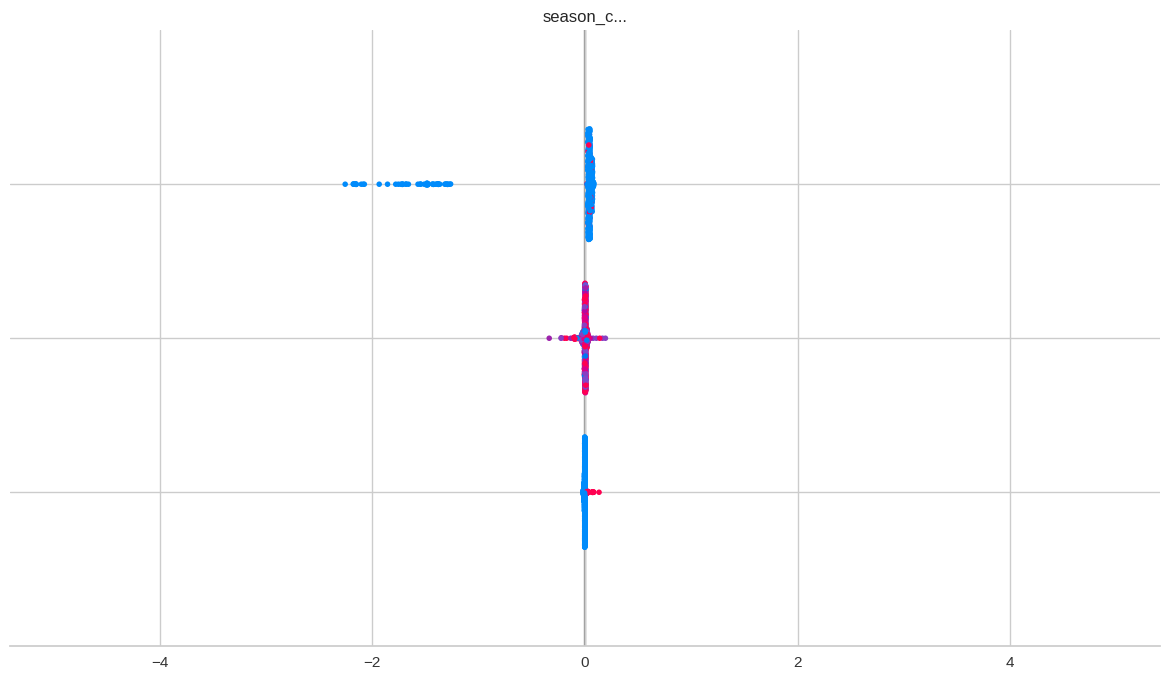

In [41]:
interpret_model(xgb)

In [31]:
import pandas as pd
df=pd.read_csv('survey_data.csv')

<ipython-input-36-b4403eddcda3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=df, palette='Pastel2')


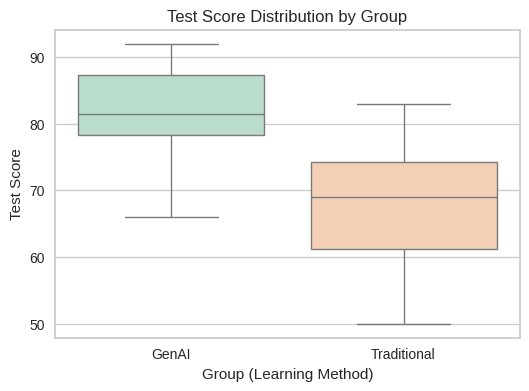

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
#Box chart
plt.figure(figsize=(6,4))
sns.boxplot(x='Group', y='Score', data=df, palette='Pastel2')
plt.title('Test Score Distribution by Group')
plt.ylabel('Test Score')
plt.xlabel('Group (Learning Method)')
plt.show()

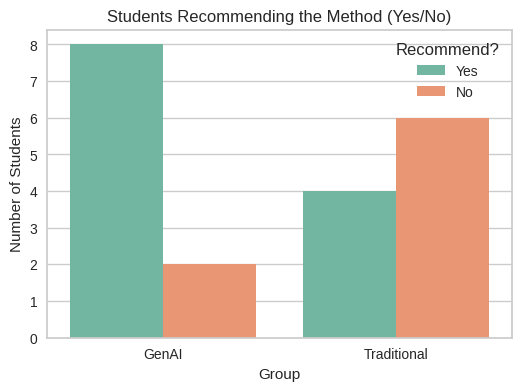

In [35]:
#Example of bar chart

plt.figure(figsize=(6,4))
sns.countplot(x='Group', hue='Recommend', data=df, palette='Set2')
plt.title('Students Recommending the Method (Yes/No)')
plt.xlabel('Group')
plt.ylabel('Number of Students')
plt.legend(title='Recommend?')
plt.show()

                 Score  Satisfaction
Score         1.000000      0.928236
Satisfaction  0.928236      1.000000


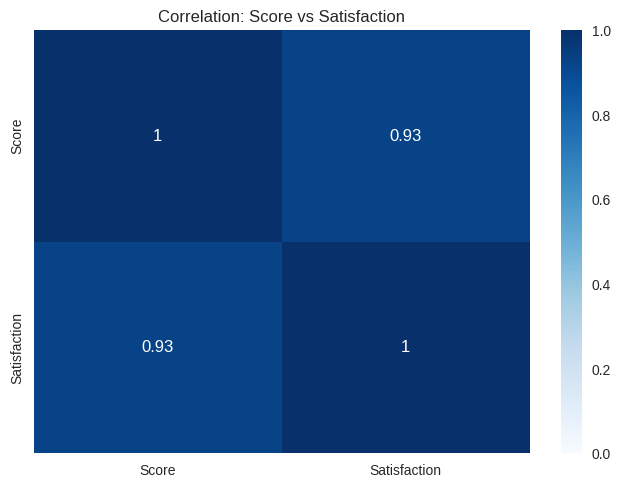

In [37]:
# Compute correlation matrix for numeric variables
corr_matrix = df[['Score','Satisfaction']].corr()
print(corr_matrix)

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=0, vmax=1)
plt.title('Correlation: Score vs Satisfaction')
plt.show()


In [38]:
!pip install wordcloud

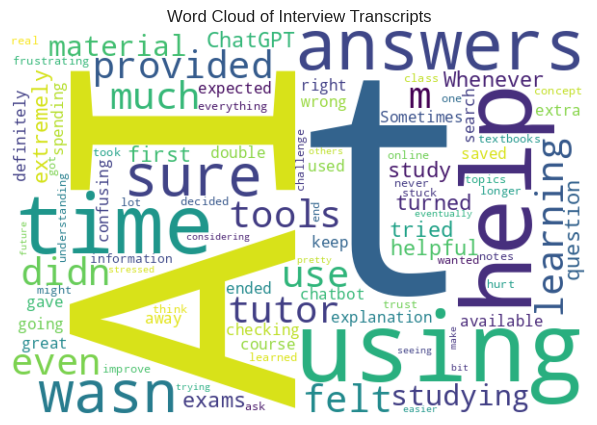

In [39]:
import json
from wordcloud import WordCloud, STOPWORDS

# Load the transcripts from the JSON file
with open('transcripts.json', 'r') as f:
    transcripts = json.load(f)

# Combine all transcript texts into one large string
all_text = " ".join([entry['text'] for entry in transcripts])

# Prepare a list of stopwords (common words like 'the', 'and', 'I' that we exclude)
stopwords = set(STOPWORDS)

# Create and generate the word cloud
wc = WordCloud(width=600, height=400, background_color="white", stopwords=stopwords)
wc.generate(all_text)

# Display the word cloud
plt.figure(figsize=(8,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Interview Transcripts")
plt.show()

In [42]:
!pip install plotly

In [58]:
tmp=df.groupby(['Region'])['Score'].count().reset_index()

In [59]:
tmp

,Region,Score
0,Africa,2
1,Asia,4
2,Europe,4
3,North America,6
4,South America,4


In [45]:
!pip install squarify

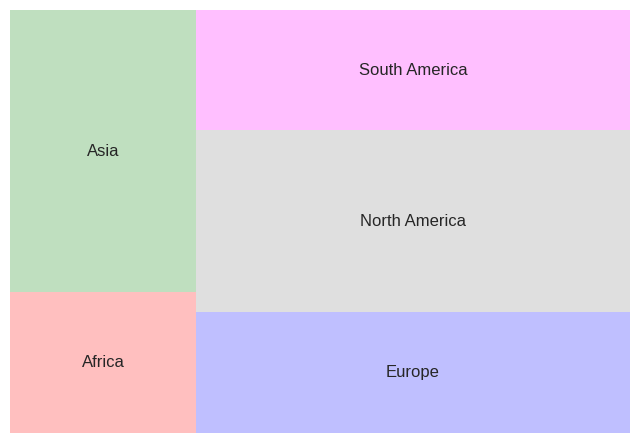

In [60]:
## Tree Map

# import plotly.express as px
# fig = px.treemap(
#     names = df['Group'],
#     parents = df['Region']
# )
# fig.update_traces(root_color="lightgrey")
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()
import squarify    # pip install squarify (algorithm for treemap)

squarify.plot(sizes=tmp['Score'], label=tmp['Region'], color=["red","green","blue", "grey","magenta"],alpha=.25 )
plt.axis('off')
plt.show()